* * *
# 지역별, 기간별 가격 상승률 비교하기
* * *
###  지수1. 한국감정원, 전국주택가격동향조사
###  지수2. 한국감정원, 공동주택실거래가격지수
###  지수3. KB주택가격동향
* * *
### 기간1 : 2017년 8.2 대책 이후 1년 (2017-08 ~ 2018-09)
### 기간2 : 2018년 9.13 대책 이후 20년7월까지 (2018-09 ~ 2020-07)
### 기간3 : 2017년 8.2 대책 이후 20년7월까지 (2017-08 ~ 2020-07)
### 기간4 : 2006년1월 부터 2020년7월까지 (2006-01 ~ 2020-07)
* * *
 <br>

In [2]:
import os, sys
import math
import datetime
import time as t

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style

style.use('dark_background')
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["figure.figsize"] = (11,4)

# csv file 읽기

In [3]:
KAB1_csv_file = "Dataset/KAB_APT_tradeIndex1.csv" # 한국감정원 전국주택가격동향조사
KAB2_csv_file = "Dataset/KAB_APT_tradeIndex2.csv" # 한국감정원 공동주택실거래가격지수
KB_csv_file = "Dataset/KB_APT_tradeIndex.csv" # KB 주택가격동향

KAB1 = pd.read_csv(KAB1_csv_file, index_col="날짜", parse_dates=True)
KAB2 = pd.read_csv(KAB2_csv_file, index_col="날짜", parse_dates=True)
KB = pd.read_csv(KB_csv_file, index_col="날짜", parse_dates=True)

# Module화 함수

In [4]:
def get_concat_df(KAB1, KAB2, KB, sido = "전국"):
    
    # dataframe 병합
    concat_df = pd.concat([KAB1[sido], KAB2[sido], KB[sido]], axis=1)
    concat_df.columns = ["감정원 전국주택가격동향", "감정원 공동주택실거래", "KB 주택가격동향"]

    # NA 제거
    concat_df = concat_df.dropna()

    # 2006년1월 = 100 scaling
    concat_df = concat_df.apply(lambda x:(x/x[0])*100)

    # plot
    concat_df.plot(title=sido) # 2006년01월 = 100
    
    return concat_df

In [5]:
def get_rising_rate(concat_df, start_date="2019-01-31", end_date="2020-07-31"):
    
    index_diff = (concat_df.loc[end_date] - concat_df.loc[start_date])
    rising_rate = (index_diff / concat_df.loc[start_date]) * 100
    rising_rate = rising_rate.round(1).astype("str") + "%"
    rising_rate = rising_rate.rename("변동률").to_frame()
    
    return rising_rate

In [6]:
def get_rising_rate_table(concat_df, first_date="2006-01-31"):
    # 구간1 : 2017년 8.2 대책 이후 1년 (2017-08-31 ~ 2018-09-30)
    rising_rate1 = get_rising_rate(concat_df, start_date="2017-08-31", end_date="2018-09-30")

    # 구간2 : 2018년 9.13 대책 이후 20년7월까지 (2018-09-30 ~ 2020-07-31)
    rising_rate2 = get_rising_rate(concat_df, start_date="2018-09-30", end_date="2020-07-31")

    # 구간3 : 2017년 8.2 대책 이후 20년7월까지 (2017-08-31 ~ 2020-07-31)
    rising_rate3 = get_rising_rate(concat_df, start_date="2017-08-31", end_date="2020-07-31")

    # 구간4 : 2006년1월 부터 2020년7월까지 (2006-01-31 ~ 2020-07-31)
    rising_rate4 = get_rising_rate(concat_df, start_date=first_date, end_date="2020-07-31")
    
    first_date = '.'.join(first_date.split('-')[0:2])

    rate_df = pd.concat([rising_rate1,rising_rate2,rising_rate3,rising_rate4], axis=1)
    rate_df.columns = ["2017.08-2018.09", "2018.09-2020.07", \
                       "2017.08-2020.07", first_date+"-2020.07"]
    
    return rate_df

# 서울 아파트 매매가 비교

,2017.08-2018.09,2018.09-2020.07,2017.08-2020.07,2006.01-2020.07
감정원 전국주택가격동향,9.2%,3.2%,12.7%,68.9%
감정원 공동주택실거래,23.2%,20.7%,48.8%,141.5%
KB 주택가격동향,13.0%,10.4%,24.8%,76.5%


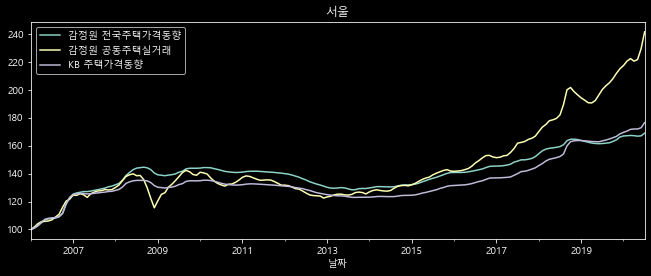

In [8]:
concat_df = get_concat_df(KAB1, KAB2, KB, sido = "서울")
get_rising_rate_table(concat_df, first_date="2006-01-31")

# 경기도 아파트 매매가 비교

,2017.08-2018.09,2018.09-2020.07,2017.08-2020.07,2006.01-2020.07
감정원 전국주택가격동향,1.5%,7.5%,9.2%,57.1%
감정원 공동주택실거래,2.6%,15.5%,18.4%,71.7%
KB 주택가격동향,2.9%,7.3%,10.5%,51.4%


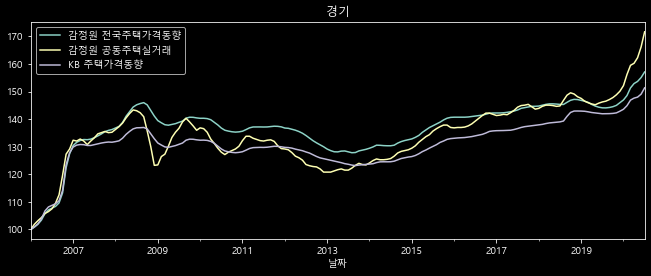

In [9]:
concat_df = get_concat_df(KAB1, KAB2, KB, sido = "경기")
get_rising_rate_table(concat_df, first_date="2006-01-31")

# 인천 아파트 매매가 비교

,2017.08-2018.09,2018.09-2020.07,2017.08-2020.07,2006.01-2020.07
감정원 전국주택가격동향,0.1%,8.3%,8.4%,65.1%
감정원 공동주택실거래,-0.8%,12.3%,11.5%,79.6%
KB 주택가격동향,0.5%,5.1%,5.6%,45.1%


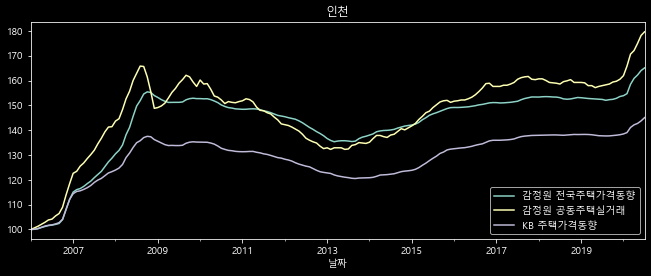

In [10]:
concat_df = get_concat_df(KAB1, KAB2, KB, sido = "인천")
get_rising_rate_table(concat_df, first_date="2006-01-31")

# 대전 아파트 매매가 비교

,2017.08-2018.09,2018.09-2020.07,2017.08-2020.07,2006.01-2020.07
감정원 전국주택가격동향,1.4%,21.8%,23.5%,56.7%
감정원 공동주택실거래,-0.2%,29.5%,29.3%,71.6%
KB 주택가격동향,1.4%,15.9%,17.5%,56.6%


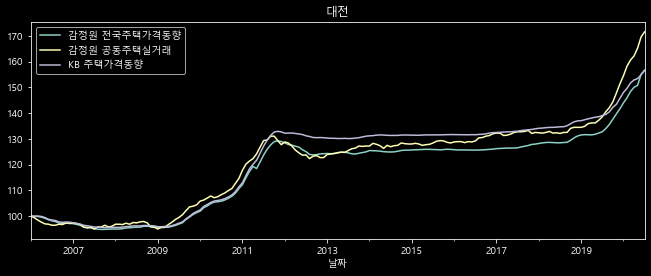

In [11]:
concat_df = get_concat_df(KAB1, KAB2, KB, sido = "대전")
get_rising_rate_table(concat_df, first_date="2006-01-31")

# 세종 아파트 매매가 비교

,2017.08-2018.09,2018.09-2020.07,2017.08-2020.07,2013.04-2020.07
감정원 전국주택가격동향,1.0%,20.2%,21.4%,26.1%
감정원 공동주택실거래,2.6%,36.1%,39.6%,61.7%
KB 주택가격동향,1.9%,12.9%,15.0%,21.5%


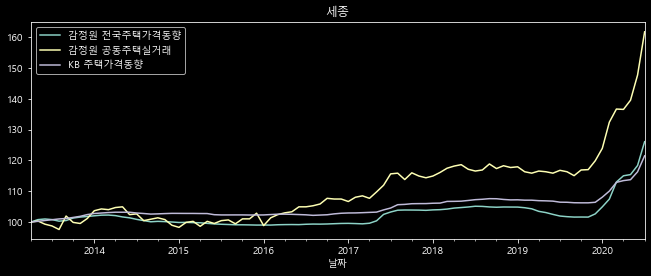

In [12]:
concat_df = get_concat_df(KAB1, KAB2, KB, sido = "세종")
get_rising_rate_table(concat_df, first_date="2013-04-30")

# 충청북도 아파트 매매가 비교

,2017.08-2018.09,2018.09-2020.07,2017.08-2020.07,2006.01-2020.07
감정원 전국주택가격동향,-5.0%,-4.5%,-9.3%,34.5%
감정원 공동주택실거래,-5.9%,0.7%,-5.2%,45.6%
KB 주택가격동향,-4.0%,-4.6%,-8.3%,43.7%


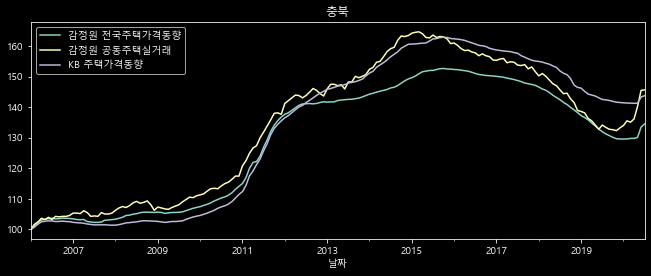

In [13]:
concat_df = get_concat_df(KAB1, KAB2, KB, sido = "충북")
get_rising_rate_table(concat_df, first_date="2006-01-31")

# 충청남도 아파트 매매가 비교

,2017.08-2018.09,2018.09-2020.07,2017.08-2020.07,2006.01-2020.07
감정원 전국주택가격동향,-4.4%,-3.0%,-7.3%,20.2%
감정원 공동주택실거래,-5.9%,3.1%,-3.1%,29.5%
KB 주택가격동향,-2.4%,-3.0%,-5.4%,26.8%


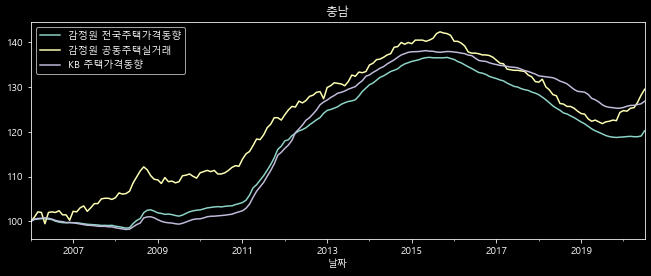

In [14]:
concat_df = get_concat_df(KAB1, KAB2, KB, sido = "충남")
get_rising_rate_table(concat_df, first_date="2006-01-31")

# 대구 아파트 매매가 비교

,2017.08-2018.09,2018.09-2020.07,2017.08-2020.07,2006.01-2020.07
감정원 전국주택가격동향,2.9%,2.2%,5.1%,53.7%
감정원 공동주택실거래,5.5%,6.7%,12.6%,77.5%
KB 주택가격동향,2.1%,3.5%,5.6%,58.9%


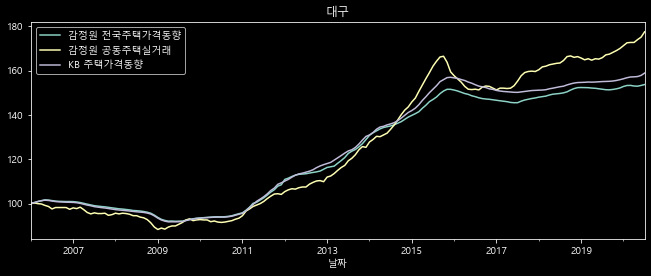

In [15]:
concat_df = get_concat_df(KAB1, KAB2, KB, sido = "대구")
get_rising_rate_table(concat_df, first_date="2006-01-31")

# 경상북도 아파트 매매가 비교

,2017.08-2018.09,2018.09-2020.07,2017.08-2020.07,2006.01-2020.07
감정원 전국주택가격동향,-5.7%,-8.3%,-13.6%,26.2%
감정원 공동주택실거래,-7.1%,-3.0%,-9.9%,37.4%
KB 주택가격동향,-4.2%,-6.2%,-10.2%,33.0%


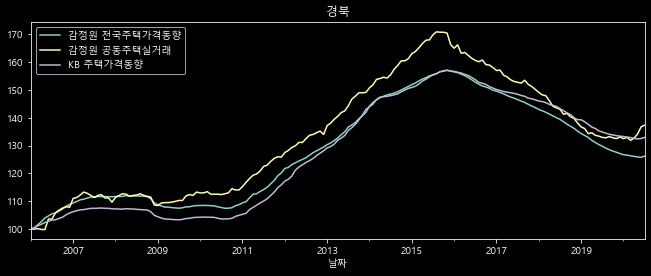

In [16]:
concat_df = get_concat_df(KAB1, KAB2, KB, sido = "경북")
get_rising_rate_table(concat_df, first_date="2006-01-31")

# 부산 아파트 매매가 비교

,2017.08-2018.09,2018.09-2020.07,2017.08-2020.07,2006.01-2020.07
감정원 전국주택가격동향,-2.8%,-2.8%,-5.6%,62.8%
감정원 공동주택실거래,-4.7%,5.2%,0.3%,103.4%
KB 주택가격동향,-1.3%,-1.4%,-2.7%,71.9%


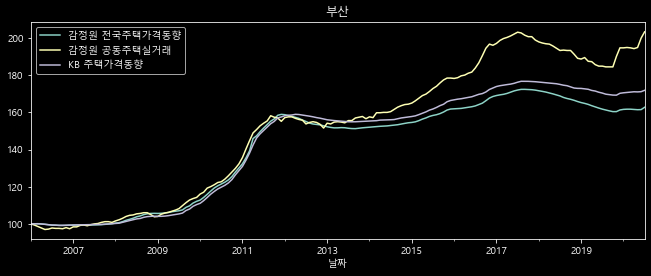

In [17]:
concat_df = get_concat_df(KAB1, KAB2, KB, sido = "부산")
get_rising_rate_table(concat_df, first_date="2006-01-31")

# 경상남도 아파트 매매가 비교

,2017.08-2018.09,2018.09-2020.07,2017.08-2020.07,2006.01-2020.07
감정원 전국주택가격동향,-8.4%,-6.6%,-14.5%,34.7%
감정원 공동주택실거래,-9.9%,-2.2%,-11.8%,43.3%
KB 주택가격동향,-5.9%,-5.3%,-10.9%,39.3%


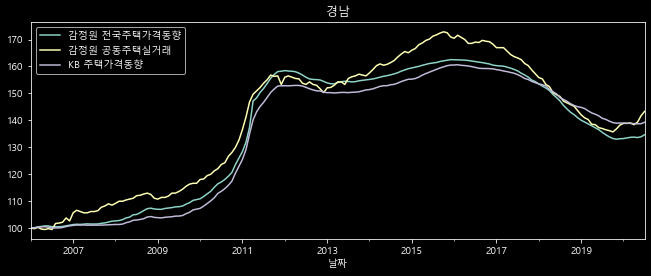

In [18]:
concat_df = get_concat_df(KAB1, KAB2, KB, sido = "경남")
get_rising_rate_table(concat_df, first_date="2006-01-31")

# 울산 아파트 매매가 비교

,2017.08-2018.09,2018.09-2020.07,2017.08-2020.07,2006.01-2020.07
감정원 전국주택가격동향,-7.9%,-4.3%,-11.8%,56.2%
감정원 공동주택실거래,-10.4%,4.6%,-6.3%,94.7%
KB 주택가격동향,-3.6%,-3.7%,-7.2%,60.4%


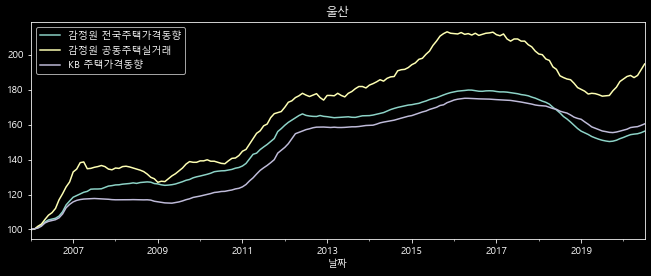

In [19]:
concat_df = get_concat_df(KAB1, KAB2, KB, sido = "울산")
get_rising_rate_table(concat_df, first_date="2006-01-31")

# 광주 아파트 매매가 비교

,2017.08-2018.09,2018.09-2020.07,2017.08-2020.07,2006.01-2020.07
감정원 전국주택가격동향,2.6%,0.9%,3.6%,61.3%
감정원 공동주택실거래,10.0%,5.9%,16.5%,113.7%
KB 주택가격동향,3.4%,2.9%,6.4%,72.1%


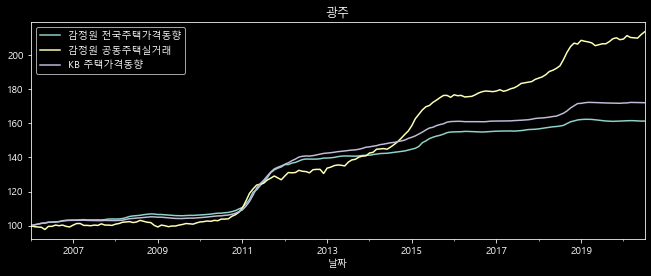

In [20]:
concat_df = get_concat_df(KAB1, KAB2, KB, sido = "광주")
get_rising_rate_table(concat_df, first_date="2006-01-31")

# 전라남도 아파트 매매가 비교

,2017.08-2018.09,2018.09-2020.07,2017.08-2020.07,2006.01-2020.07
감정원 전국주택가격동향,1.9%,1.0%,2.9%,63.9%
감정원 공동주택실거래,3.1%,4.4%,7.7%,108.8%
KB 주택가격동향,1.9%,1.2%,3.1%,44.5%


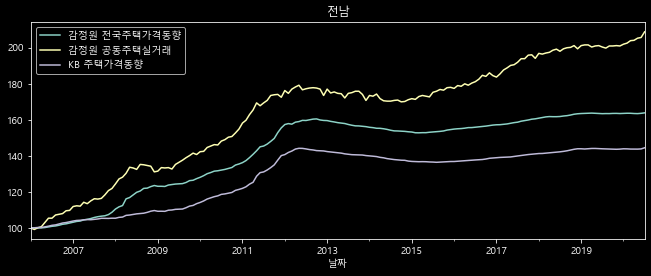

In [21]:
concat_df = get_concat_df(KAB1, KAB2, KB, sido = "전남")
get_rising_rate_table(concat_df, first_date="2006-01-31")

# 전라북도 아파트 매매가 비교

,2017.08-2018.09,2018.09-2020.07,2017.08-2020.07,2006.01-2020.07
감정원 전국주택가격동향,-1.1%,-3.9%,-5.0%,52.1%
감정원 공동주택실거래,-1.6%,-1.0%,-2.6%,70.3%
KB 주택가격동향,-1.1%,-4.2%,-5.2%,48.5%


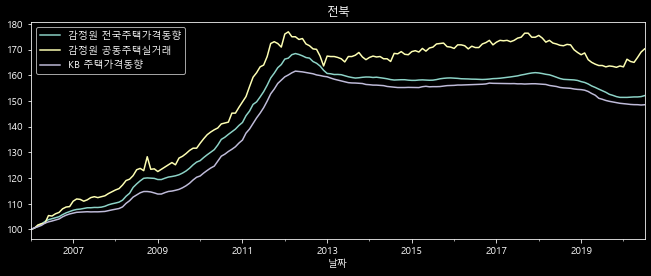

In [22]:
concat_df = get_concat_df(KAB1, KAB2, KB, sido = "전북")
get_rising_rate_table(concat_df, first_date="2006-01-31")

# 강원도 아파트 매매가 비교

,2017.08-2018.09,2018.09-2020.07,2017.08-2020.07,2006.01-2020.07
감정원 전국주택가격동향,-2.4%,-8.1%,-10.3%,24.3%
감정원 공동주택실거래,-2.4%,-5.9%,-8.2%,48.8%
KB 주택가격동향,-0.1%,-6.1%,-6.2%,30.4%


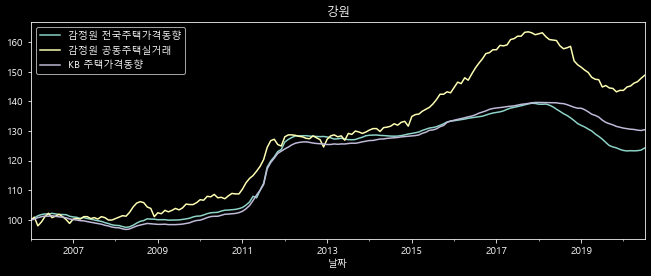

In [23]:
concat_df = get_concat_df(KAB1, KAB2, KB, sido = "강원")
get_rising_rate_table(concat_df, first_date="2006-01-31")

# 제주도 아파트 매매가 비교

,2017.08-2018.09,2018.09-2020.07,2017.08-2020.07,2006.01-2020.07
감정원 전국주택가격동향,-2.5%,-6.0%,-8.3%,73.8%
감정원 공동주택실거래,1.3%,-6.3%,-5.0%,139.0%
KB 주택가격동향,-1.2%,-3.5%,-4.7%,68.0%


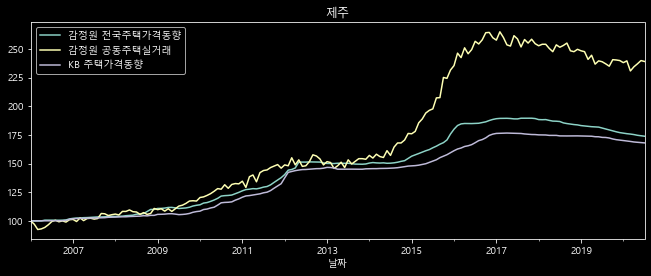

In [24]:
concat_df = get_concat_df(KAB1, KAB2, KB, sido = "제주")
get_rising_rate_table(concat_df, first_date="2006-01-31")